In [1]:
%matplotlib inline 
import pandas as pd

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [4]:
# Date is irrelevant
# Sunshine and Evaporation have over 60k nans
# RISK_MM is too correlated
# Cloud 9am, Cloud 3pm 50k nans
# WindDir, we are measuring form different locations
df = df.drop(columns=['Date', 'Sunshine', 'Evaporation', 'RISK_MM', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'Location'])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [5]:
df.isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [6]:
df = df.dropna()
df.shape

(119590, 14)

In [7]:
df.head()
df['RainToday'] = df['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)
df.head()
y = df['RainTomorrow']
X = df.drop(columns=['RainTomorrow'])
save_rain = X['RainToday']
X = X.drop(columns=['RainToday'])
X = (X - X.mean())/X.std()
X.head()
X['RainToday'] = save_rain
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.159159,-0.083870,-0.203299,0.288756,0.640741,0.566867,0.141679,-1.395053,-1.402508,-1.161488,-0.044318,-0.026148,0
1,-0.783120,0.231020,-0.274178,0.288756,-1.178196,0.336328,-1.269770,-1.250068,-0.993970,-1.061765,0.002197,0.339734,0
2,0.080636,0.316899,-0.274178,0.437127,0.527058,0.797406,-1.583426,-1.008426,-1.416596,-0.933549,0.591398,0.178746,0
3,-0.500436,0.646101,-0.274178,-1.194951,-0.382411,-1.162173,-1.217494,-1.685023,-0.007845,-0.349454,0.141745,0.661710,0
4,0.803050,1.261567,-0.156046,0.066200,-0.837145,0.105790,0.716714,-0.863441,-0.965795,-1.318197,0.095229,1.130039,0


In [8]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


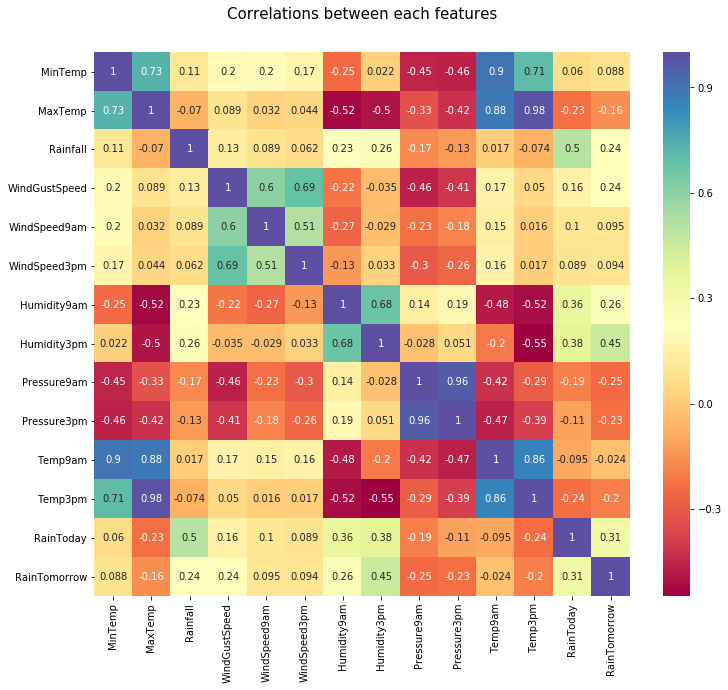

In [9]:
# update: the correlations to RainToday and RainTomorrow are also included.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
colormap = plt.cm.Spectral
plt.title('Correlations between each features', y=1.05, size=15)
corrs = df.corr()
sns.heatmap(corrs, cmap = colormap, linecolor = 'white', annot = True)

Text(0, 0.5, 'Correlation to Rainfall')

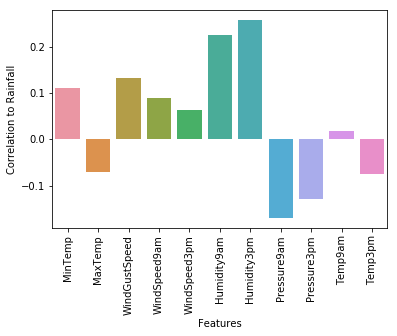

In [10]:
# I also included the graph of correlations to RainToday below. That might make more sense to analyze instead of the correlations to amount of rainfall
rainfall_corrs = corrs[['Rainfall']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'Rainfall', data = rainfall_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to Rainfall')

Text(0, 0.5, 'Correlation to RainTomorrow')

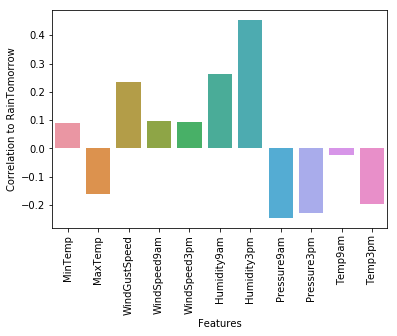

In [11]:
raintomorrow_corrs = corrs[['RainTomorrow']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainTomorrow', data = raintomorrow_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainTomorrow')

Text(0, 0.5, 'Correlation to RainToday')

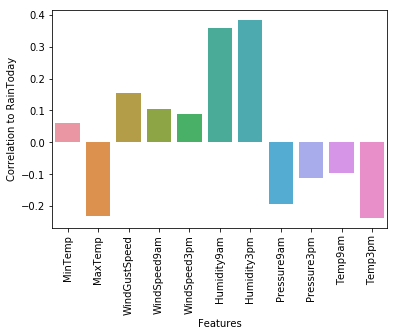

In [12]:
raintoday_corrs = corrs[['RainToday']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainToday', data = raintoday_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainToday')

## Partitioning the Dataset
Below we partition the dataset into training, validation, and test sets.

In [13]:
val_size   = int(.2 * df.shape[0])
test_size  = int(.1 * df.shape[0])
train_size = int(.7 * df.shape[0])
df_train = df[:train_size]
df_val = df[train_size : train_size + val_size]
df_test = df[train_size + val_size : train_size + val_size + test_size]

print(f"Training data length:   {len(df_train)}")
print(f"Validation data length: {len(df_val)}")
print(f"Test data length:       {len(df_test)}")

Training data length:   83713
Validation data length: 23918
Test data length:       11959


## Splitting Into Targets and Labels
Below the train, test, and validation data sets are split into labels and targets then converted to numpy arrays.

In [14]:
df_train.head()
y_train = df_train['RainTomorrow'].values
y_test = df_test['RainTomorrow'].values
y_val = df_val['RainTomorrow'].values
X_train = df_train.drop(columns=['RainTomorrow']).values
X_test = df_test.drop(columns=['RainTomorrow']).values
X_val = df_val.drop(columns=['RainTomorrow']).values


## Tensorflow Feed Forward Neural Network
Below we define a feed forward neural network. The network takes as input the features of a single day. The output is a sigmoid layer meaning our output layer is essentially a logistic regression layer. We use binary cross entropy loss and accuracy to evaluate model performace. The model is evaluated on validation data on every epoch.

In [15]:
import tensorflow as tf
from tensorflow import keras

INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(16, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(16, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


## Training the Network
Here we fit the network onto the training data set for 10 epochs. We use our validation data to prevent overfitting.

In [16]:
from keras.callbacks import History 

history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Using TensorFlow backend.


Train on 83713 samples, validate on 23918 samples
Epoch 1/10
83713/83713 [==============================] - 2s 24us/step - loss: 0.4323 - acc: 0.8147 - binary_crossentropy: 0.4323 - val_loss: 0.4132 - val_acc: 0.7736 - val_binary_crossentropy: 0.4132
Epoch 2/10
83713/83713 [==============================] - 1s 15us/step - loss: 0.4095 - acc: 0.8284 - binary_crossentropy: 0.4095 - val_loss: 0.3713 - val_acc: 0.8553 - val_binary_crossentropy: 0.3713
Epoch 3/10
83713/83713 [==============================] - 1s 14us/step - loss: 0.4034 - acc: 0.8301 - binary_crossentropy: 0.4034 - val_loss: 0.4852 - val_acc: 0.7630 - val_binary_crossentropy: 0.4852
Epoch 4/10
83713/83713 [==============================] - 1s 13us/step - loss: 0.4057 - acc: 0.8320 - binary_crossentropy: 0.4057 - val_loss: 0.3908 - val_acc: 0.8443 - val_binary_crossentropy: 0.3908
Epoch 5/10
83713/83713 [==============================] - 1s 14us/step - loss: 0.3976 - acc: 0.8360 - binary_crossentropy: 0.3976 - val_loss: 0.36

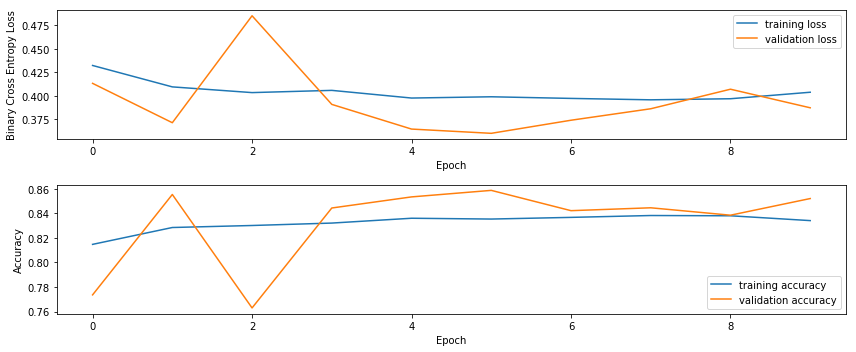

In [17]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
train_acc = history.history['acc']
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# Loss Axis
ax1.plot(list(range(EPOCHS)), train_loss)
ax1.plot(list(range(EPOCHS)), val_loss)
ax1.set_xlabel('Epoch')
ax1.legend(['training loss', 'validation loss'])
ax1.set_ylabel('Binary Cross Entropy Loss')

# Accuracy Axis
ax2.plot(list(range(EPOCHS)), train_acc)
ax2.plot(list(range(EPOCHS)), val_acc)
ax2.legend(['training accuracy', 'validation accuracy'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [18]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}\nTest Accuracy: {test_acc}")

11959/11959 [==============================] - 0s 17us/step
Test Loss: 0.3216685513901226
Test Accuracy: 0.875324023747805
